In [1]:
# A script file to produce plots and analyze columns 1. Source, 2. Opening Revenue, 3. Production budget, youtube viewcount
# By Chris Chiang

# Dependencies
import scipy.stats as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# read in csv file for title lis
movie_csv = "../data_files/final.csv"

In [2]:
# read in csv file for title list
movie_df = pd.read_csv(movie_csv)
movie_df.head()


Released                           Title  \
0  2000-11-17 00:00:00+00:00  How the Grinch Stole Christmas   
1  2000-12-22 00:00:00+00:00                       Cast Away   
2  2000-05-24 00:00:00+00:00          Mission: Impossible II   
3  2000-05-05 00:00:00+00:00                       Gladiator   
4  2000-12-15 00:00:00+00:00                 What Women Want   

                              Source  Production Budget  \
0  Based on Fiction Book/Short Story          123000000   
1                Original Screenplay           85000000   
2                        Based on TV          120000000   
3                Original Screenplay          103000000   
4                Original Screenplay           65000000   

   Opening Weekend Revenue  Domestic Box Office  Infl. Adj. Dom. Box Office  \
0                 55820330            260044825                   438980791   
1                 28883406            233632142                   384884272   
2                 57845297            215409889                   364078672   
3                 34819017            187683805                   317130387   
4                 33614543            182805123                   303565725   

   International Box Office  Worldwide Box Office  \
0                  85096578             345141403   
1                 193598374             427230516   
2                 334178627             549588516   
3                 270000000             457683805   
4                 191300000             374105123   

                                             ratings  ... nominations  \
0  [{'Source': 'Internet Movie Database', 'Value'...  ...        37.0   
1  [{'Source': 'Internet Movie Database', 'Value'...  ...        35.0   
2  [{'Source': 'Internet Movie Database', 'Value'...  ...        20.0   
3  [{'Source': 'Internet Movie Database', 'Value'...  ...       104.0   
4  [{'Source': 'Internet Movie Database', 'Value'...  ...         8.0   

                      trailer ids  max viewcount Infl. Adj. Production Budget  \
0                 ['myTaigPrbsg']      3226963.0                    207635884   
1  ['4olwbrY2kwE', 'yY9Nm4RF-K0']       598437.0                    140028520   
2                 ['vIpqpRuGrq4']      1171309.0                    202820032   
3  ['owK1qxDselE', 'AxQajgTyLcM']      2259163.0                    174039682   
4                 ['VFwHs7fEUNs']      1313029.0                    107938835   

   Infl. Adj. International Box Office  Infl. Adj. Worldwide Box Office  \
0                            143651245                        582632036   
1                            318932868                        703817140   
2                            564817665                        928896337   
3                            456220527                        773350914   
4                            317672296                        621238021   

   Infl. Adj. Opening Weekend Revenue      Genre  release_year release_month  
0                            94230110     Family          2000            11  
1                            47582360  Adventure          2000            12  
2                            97768208  Adventure          2000             5  
3                            58833889     Action          2000             5  
4                            55820225     Comedy          2000            12  

[5 rows x 28 columns]

Original Screenplay                    854
Based on Fiction Book/Short Story      371
Remake                                 113
Based on Comic/Graphic Novel           105
Based on Real Life Events               91
Based on TV                             76
Based on Factual Book/Article           62
Based on Folk Tale/Legend/Fairytale     29
Based on Game                           21
Based on Play                           19
Spin-Off                                18
Based on Musical or Opera                7
Based on Short Film                      7
Based on Theme Park Ride                 7
Based on Religious Text                  7
Based on Toy                             6
Based on Movie                           2
Based on Web Series                      1
Name: Source, dtype: int64

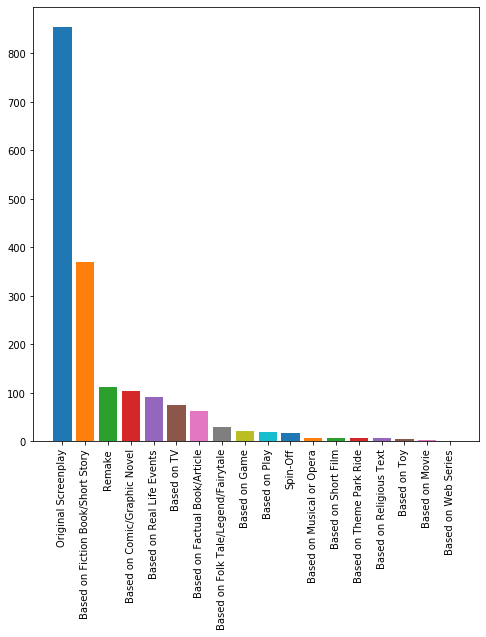

In [3]:
sources=movie_df['Source']
source_gb = movie_df.groupby('Source')
colors = [f'C{x}' for x in range(len(sources.value_counts().index))]
plt.figure(figsize=(8,8))
plt.bar(sources.value_counts().index,sources.value_counts(),color=colors)
plt.xticks(rotation=90)
sources.value_counts()

In [4]:
movie_df.columns

Index(['Released', 'Title', 'Source', 'Production Budget',
       'Opening Weekend Revenue', 'Domestic Box Office',
       'Infl. Adj. Dom. Box Office', 'International Box Office',
       'Worldwide Box Office', 'ratings', 'awards', 'rated', 'runtime',
       'genere', 'metascore', 'imdbRating', 'imdbVotes', 'imdbID',
       'nominations', 'trailer ids', 'max viewcount',
       'Infl. Adj. Production Budget', 'Infl. Adj. International Box Office',
       'Infl. Adj. Worldwide Box Office', 'Infl. Adj. Opening Weekend Revenue',
       'Genre', 'release_year', 'release_month'],
      dtype='object')

In [95]:
# Sort by box office/return
dom_sort=movie_df.sort_values('Infl. Adj. Dom. Box Office',ascending=False)
world_sort=movie_df.sort_values('Infl. Adj. Worldwide Box Office',ascending=False)
movie_df['Return world adj']=movie_df['Infl. Adj. Worldwide Box Office']-movie_df['Infl. Adj. Production Budget']
movie_df['Return world per']=(movie_df['Infl. Adj. Worldwide Box Office'])/movie_df['Infl. Adj. Production Budget']*100
return_sort=movie_df.sort_values('Return world per',ascending=False)
movie_df['Infl. Adj. Dom. Box Office']=movie_df['Infl. Adj. Dom. Box Office']/1000000
movie_df['Infl. Adj. International Box Office']=movie_df['Infl. Adj. International Box Office']/1000000
movie_df['Infl. Adj. Worldwide Box Office']=movie_df['Infl. Adj. Worldwide Box Office']/1000000
movie_df['Infl. Adj. Production Budget']=movie_df['Infl. Adj. Production Budget']/1000000
movie_df['Infl. Adj. Opening Weekend Revenue']=movie_df['Infl. Adj. Opening Weekend Revenue']/1000000






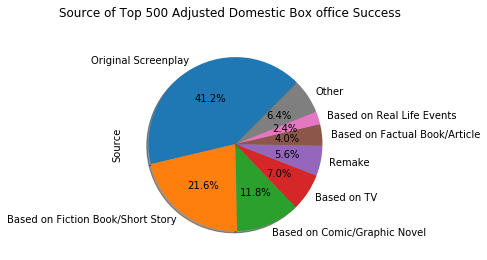

In [86]:
pie_series = dom_sort.iloc[0:500]['Source'].value_counts().loc[dom_sort.iloc[0:500]['Source'].value_counts() > 10]
pie_series['Other']=dom_sort.iloc[0:500]['Source'].value_counts().loc[dom_sort.iloc[0:500]['Source'].value_counts() < 10].sum()
pie_series.plot.pie(subplots=True, autopct="%1.1f%%", shadow=True, startangle=45, title='Source of Top 500 Adjusted Domestic Box office Success')
plt.savefig('../plot_pics/Source1.png')

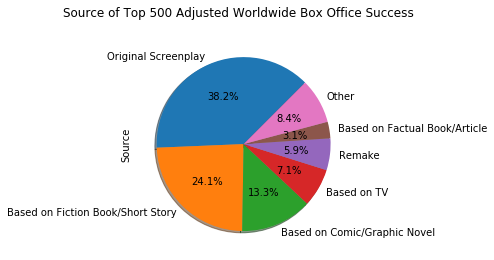

In [87]:
pie_series = world_sort.iloc[0:500]['Source'].value_counts().loc[world_sort.iloc[0:500]['Source'].value_counts() > 10]
pie_series['Other']=world_sort.iloc[0:500]['Source'].value_counts().loc[world_sort.iloc[0:500]['Source'].value_counts() < 10].sum()
pie_series.plot.pie(subplots=True, autopct="%1.1f%%", shadow=True, startangle=45, title='Source of Top 500 Adjusted Worldwide Box Office Success')
plt.savefig('../plot_pics/Source2.png')

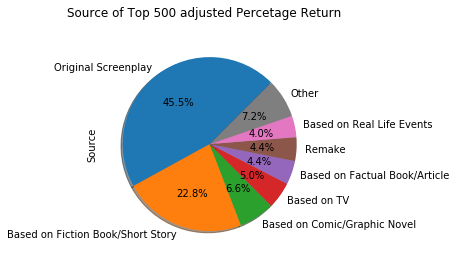

In [88]:
pie_series = return_sort.iloc[0:500]['Source'].value_counts().loc[return_sort.iloc[0:500]['Source'].value_counts() > 10]
pie_series['Other']=return_sort.iloc[0:500]['Source'].value_counts().loc[return_sort.iloc[0:500]['Source'].value_counts() < 10].sum()
pie_series.plot.pie(subplots=True, autopct="%1.1f%%", shadow=True, startangle=45, title='Source of Top 500 adjusted Percetage Return')
plt.savefig('../plot_pics/Source3.png')


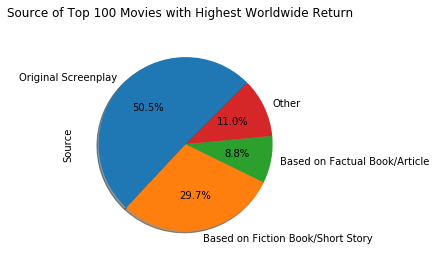

In [89]:
pie_series = return_sort.iloc[0:100]['Source'].value_counts().loc[return_sort.iloc[0:100]['Source'].value_counts() > 3]
pie_series['Other']=return_sort.iloc[0:100]['Source'].value_counts().loc[return_sort.iloc[0:100]['Source'].value_counts() < 3].sum()
pie_series.plot.pie(subplots=True, autopct="%1.1f%%", shadow=True, startangle=45, title='Source of Top 100 Movies with Highest Worldwide Return')
plt.savefig('../plot_pics/Source4.png')


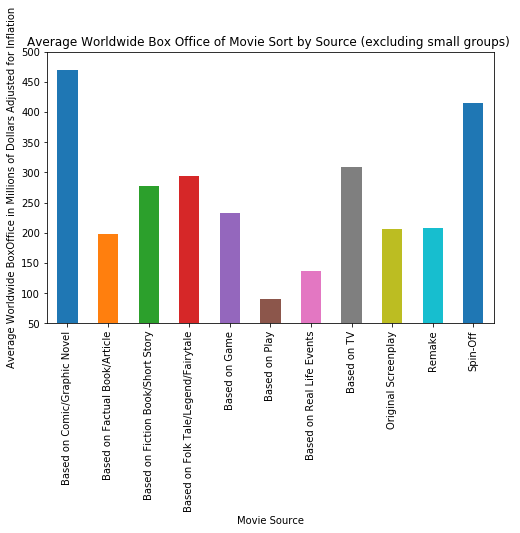

In [147]:
y=source_gb['Infl. Adj. Worldwide Box Office'].mean()
exclude_low=movie_df['Source'].value_counts()>10
colors = [f'C{x}' for x in range(len(exclude_low))]
y.loc[exclude_low].plot.bar(colors=colors,figsize=(8,5))
plt.title("Average Worldwide Box Office of Movie Sort by Source (excluding small groups) ")
plt.xlabel("Movie Source")
plt.ylabel("Average Worldwide BoxOffice in Millions of Dollars Adjusted for Inflation")
plt.ylim(50,500)
plt.savefig('../plot_pics/Source5.png',pad_inches=(8,5),dpi=500)


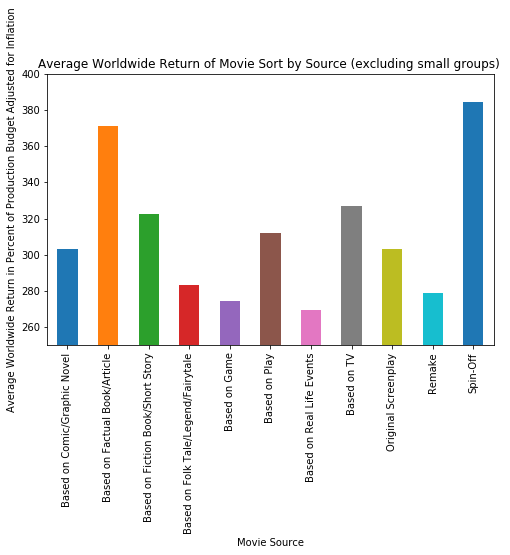

In [91]:
y=source_gb['Return world per'].mean()
exclude_low=movie_df['Source'].value_counts()>10
colors = [f'C{x}' for x in range(len(exclude_low))]
y.loc[exclude_low].plot.bar(colors=colors,figsize=(8,5))
plt.title("Average Worldwide Return of Movie Sort by Source (excluding small groups) ") #less than 10 movies
plt.xlabel("Movie Source")
plt.ylabel("Average Worldwide Return in Percent of Production Budget Adjusted for Inflation")

plt.ylim(250,400)
plt.savefig('../plot_pics/Source6.png')


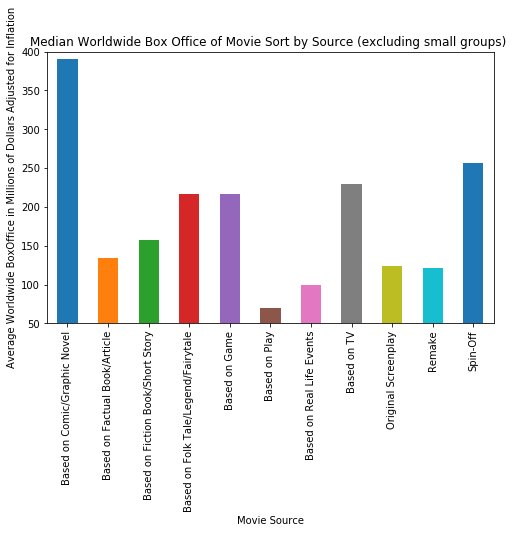

In [92]:
# conclusion data for sequls??
# Og not bad too broad star wars, avator, indian jones
# Spin off, comic
# base on tv, fiction
# non fiction, smaller but safe bet
# disney fairtale, mediocore
# no remake, game
# religious movie very high but 7 m

y=source_gb['Infl. Adj. Worldwide Box Office'].median()/1000000
exclude_low=movie_df['Source'].value_counts()>10
colors = [f'C{x}' for x in range(len(exclude_low))]
y.loc[exclude_low].plot.bar(colors=colors,figsize=(8,5))
plt.title("Median Worldwide Box Office of Movie Sort by Source (excluding small groups) ")
plt.xlabel("Movie Source")
plt.ylabel("Average Worldwide BoxOffice in Millions of Dollars Adjusted for Inflation")
plt.ylim(50,400)
plt.savefig('../plot_pics/Source7.png')


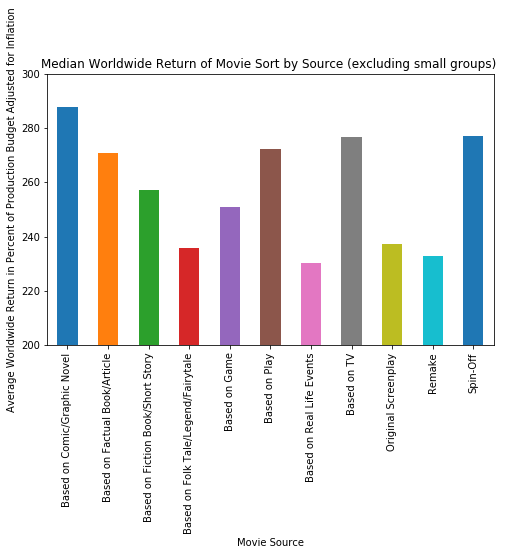

In [93]:
y=source_gb['Return world per'].median()
exclude_low=movie_df['Source'].value_counts()>10
colors = [f'C{x}' for x in range(len(exclude_low))]
y.loc[exclude_low].plot.bar(colors=colors,figsize=(8,5))
plt.title("Median Worldwide Return of Movie Sort by Source (excluding small groups) ") #less than 10 movies
plt.xlabel("Movie Source")
plt.ylabel("Average Worldwide Return in Percent of Production Budget Adjusted for Inflation")

plt.ylim(200,300)
plt.savefig('../plot_pics/Source8.png')


In [14]:
def line_plot(x, y):
    # Function that takes in 2 panda series x, y and plots a linear regression line
    slope, inter, rval, pval, stderr = st.linregress(x, y)
    print(f'The r-squared is : {rval ** 2}')
    x_line = np.arange(x.min(), x.max()+1, ((x.max()-x.min())/100))
    y_line = (slope * x_line) + inter
    plt.plot(x_line, y_line, 'r',
             label='y = {0:.3f}x + {1:.3f}, r-square ={2:.2f}'.format(slope, inter,rval ** 2))
    # Using legned label to annotate because it can use best location
    plt.legend(loc='best')




The r-squared is : 0.6879120021651185


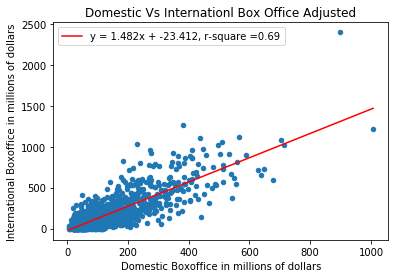

In [97]:
movie_df.plot.scatter('Infl. Adj. Dom. Box Office','Infl. Adj. International Box Office')
line_plot(movie_df['Infl. Adj. Dom. Box Office'],movie_df['Infl. Adj. International Box Office'])
plt.title("Domestic Vs Internationl Box Office Adjusted")
plt.xlabel("Domestic Boxoffice in millions of dollars")
plt.ylabel("International Boxoffice in millions of dollars")
plt.savefig('../plot_pics/DomVSInter.png')


The r-squared is : 0.7217316088386965


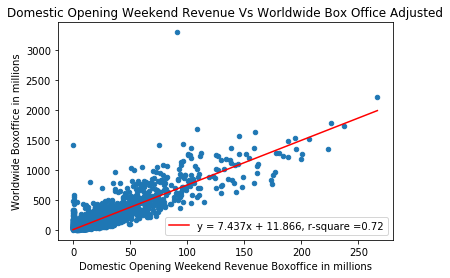

In [115]:

movie_df.plot.scatter('Infl. Adj. Opening Weekend Revenue','Infl. Adj. Worldwide Box Office')
line_plot(movie_df['Infl. Adj. Opening Weekend Revenue'],movie_df['Infl. Adj. Worldwide Box Office'])

plt.title("Domestic Opening Weekend Revenue Vs Worldwide Box Office Adjusted")
plt.xlabel("Domestic Opening Weekend Revenue Boxoffice in millions")
plt.ylabel("Worldwide Boxoffice in millions")
plt.savefig('../plot_pics/openVSworld.png')

# 'Opening Weekend Revenue' # domestic

The r-squared is : 0.7942682369028335


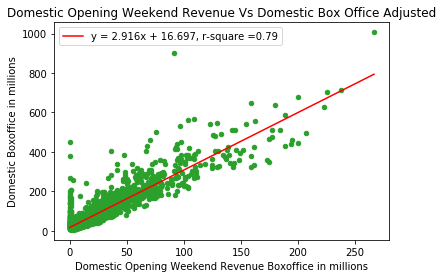

In [116]:
movie_df.plot.scatter('Infl. Adj. Opening Weekend Revenue','Infl. Adj. Dom. Box Office',colors='C2')
line_plot(movie_df['Infl. Adj. Opening Weekend Revenue'],movie_df['Infl. Adj. Dom. Box Office'])
plt.title("Domestic Opening Weekend Revenue Vs Domestic Box Office Adjusted")
plt.xlabel("Domestic Opening Weekend Revenue Boxoffice in millions")
plt.ylabel("Domestic Boxoffice in millions")
plt.savefig('../plot_pics/openVSdom.png')

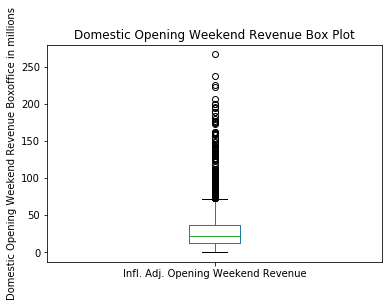

In [118]:
movie_df['Infl. Adj. Opening Weekend Revenue'].plot.box()
q1, q2, q3 = movie_df['Infl. Adj. Opening Weekend Revenue'].quantile([.25, .5, .75])
IQR = q3 - q1
lower_limit = q1 - (1.5 * IQR)
upper_limit = q3 + (1.5 * IQR)
upper_limit
plt.title("Domestic Opening Weekend Revenue Box Plot")
plt.ylabel("Domestic Opening Weekend Revenue Boxoffice in millions")
plt.savefig('../plot_pics/openbox.png')

In [104]:
no_open_out = movie_df.loc[movie_df['Infl. Adj. Opening Weekend Revenue']<upper_limit]
no_open_out.head()

Released              Title  \
1  2000-12-22 00:00:00+00:00          Cast Away   
3  2000-05-05 00:00:00+00:00          Gladiator   
4  2000-12-15 00:00:00+00:00    What Women Want   
5  2000-06-30 00:00:00+00:00  The Perfect Storm   
6  2000-10-06 00:00:00+00:00   Meet the Parents   

                          Source  Production Budget  Opening Weekend Revenue  \
1            Original Screenplay           85000000                 28883406   
3            Original Screenplay          103000000                 34819017   
4            Original Screenplay           65000000                 33614543   
5  Based on Factual Book/Article          120000000                 41325042   
6            Original Screenplay           55000000                 28623300   

   Domestic Box Office  Infl. Adj. Dom. Box Office  International Box Office  \
1            233632142                  384.884272                 193598374   
3            187683805                  317.130387                 270000000   
4            182805123                  303.565725                 191300000   
5            182618434                  308.655646                 146093000   
6            166225040                  280.553027                 164200000   

   Worldwide Box Office                                            ratings  \
1             427230516  [{'Source': 'Internet Movie Database', 'Value'...   
3             457683805  [{'Source': 'Internet Movie Database', 'Value'...   
4             374105123  [{'Source': 'Internet Movie Database', 'Value'...   
5             328711434  [{'Source': 'Internet Movie Database', 'Value'...   
6             330425040  [{'Source': 'Internet Movie Database', 'Value'...   

   ... max viewcount Infl. Adj. Production Budget  \
1  ...      599674.0                   140.028520   
3  ...     2262657.0                   174.039682   
4  ...     1315229.0                   107.938835   
5  ...       87080.0                   202.820036   
6  ...       17461.0                    92.828472   

   Infl. Adj. International Box Office Infl. Adj. Worldwide Box Office  \
1                           318.932868                      703.817140   
3                           456.220527                      773.350914   
4                           317.672296                      621.238021   
5                           246.921563                      555.577209   
6                           277.135183                      557.688210   

   Infl. Adj. Opening Weekend Revenue      Genre  release_year release_month  \
1                           47.582360  Adventure          2000            12   
3                           58.833889     Action          2000             5   
4                           55.820225     Comedy          2000            12   
5                           69.846221      Drama          2000             6   
6                           48.310130     Comedy          2000            10   

   Return world adj Return world per  
1         563788620       502.624137  
3         599311232       444.353210  
4         513299186       575.546346  
5         352757173       273.926196  
6         464859738       600.772800  

[5 rows x 30 columns]

The r-squared is : 0.4754415362994705


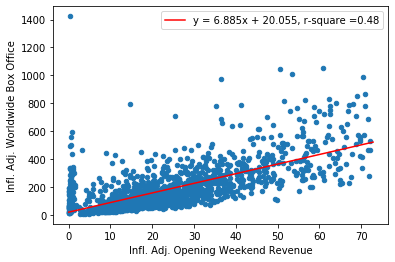

In [105]:
no_open_out.plot.scatter('Infl. Adj. Opening Weekend Revenue','Infl. Adj. Worldwide Box Office')
line_plot(no_open_out['Infl. Adj. Opening Weekend Revenue'],no_open_out['Infl. Adj. Worldwide Box Office'])

The r-squared is : 0.5845810466301934


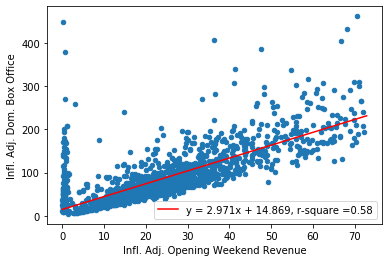

In [106]:
no_open_out.plot.scatter('Infl. Adj. Opening Weekend Revenue','Infl. Adj. Dom. Box Office')
line_plot(no_open_out['Infl. Adj. Opening Weekend Revenue'],no_open_out['Infl. Adj. Dom. Box Office'])


The r-squared is : 0.1537259524914579


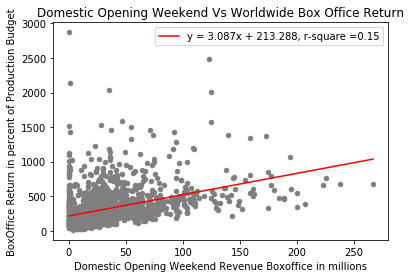

In [130]:
movie_df.plot.scatter('Infl. Adj. Opening Weekend Revenue','Return world per',colors='C7')
line_plot(movie_df['Infl. Adj. Opening Weekend Revenue'],movie_df['Return world per'])

plt.title("Domestic Opening Weekend Vs Worldwide Box Office Return")
plt.xlabel("Domestic Opening Weekend Revenue Boxoffice in millions")
plt.ylabel("BoxOffice Return in percent of Production Budget")
plt.savefig('../plot_pics/openVSre.png')

The r-squared is : 0.07314428923217578


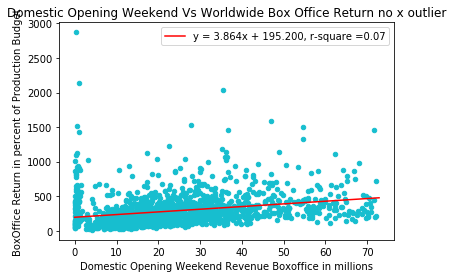

In [138]:
no_open_out.plot.scatter('Infl. Adj. Opening Weekend Revenue','Return world per',colors='C9')
line_plot(no_open_out['Infl. Adj. Opening Weekend Revenue'],no_open_out['Return world per'])

plt.title("Domestic Opening Weekend Vs Worldwide Box Office Return no x outlier")
plt.xlabel("Domestic Opening Weekend Revenue Boxoffice in millions")
plt.ylabel("BoxOffice Return in percent of Production Budget")
plt.savefig('../plot_pics/openVSre_out1.png')

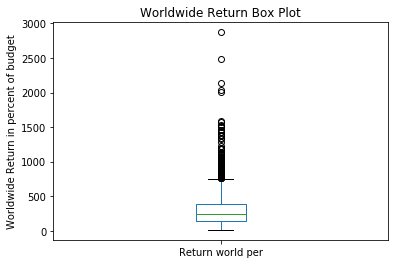

In [132]:
movie_df['Return world per'].plot.box()
q1, q2, q3 = movie_df['Return world per'].quantile([.25, .5, .75])
IQR = q3 - q1
lower_limit = q1 - (1.5 * IQR)
upper_limit = q3 + (1.5 * IQR)
upper_limit
no_open_out_return_out = no_open_out.loc[no_open_out['Return world per']<upper_limit]
no_open_out_return_out.head()
no_return_out = movie_df.loc[movie_df['Return world per']<upper_limit]
plt.title("Worldwide Return Box Plot")
plt.ylabel("Worldwide Return in percent of budget")
plt.savefig('../plot_pics/returnbox.png')

The r-squared is : 0.13267848950799233


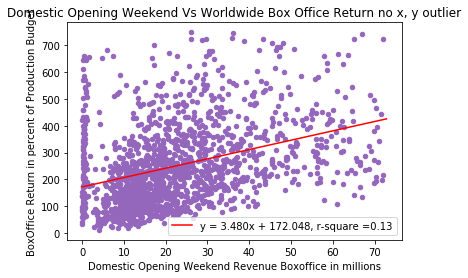

In [137]:
no_open_out_return_out.plot.scatter('Infl. Adj. Opening Weekend Revenue','Return world per', colors='C4')
line_plot(no_open_out_return_out['Infl. Adj. Opening Weekend Revenue'],no_open_out_return_out['Return world per'])
# no return coclusion
# big movie, big open, big gross
# world vs domes

plt.title("Domestic Opening Weekend Vs Worldwide Box Office Return no x, y outlier")
plt.xlabel("Domestic Opening Weekend Revenue Boxoffice in millions")
plt.ylabel("BoxOffice Return in percent of Production Budget")
plt.savefig('../plot_pics/openVSre_out2.png')

The r-squared is : 0.48168688474741156


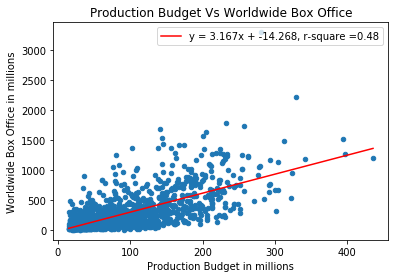

In [158]:
movie_df.plot.scatter('Infl. Adj. Production Budget','Infl. Adj. Worldwide Box Office')
line_plot(movie_df['Infl. Adj. Production Budget'],movie_df['Infl. Adj. Worldwide Box Office'])

plt.title("Production Budget Vs Worldwide Box Office")
plt.xlabel("Production Budget in millions")
plt.ylabel("Worldwide Box Office in millions")
plt.savefig('../plot_pics/pro1.png')

# !!!

In [33]:
movie_df.columns

Index(['Released', 'Title', 'Source', 'Production Budget',
       'Opening Weekend Revenue', 'Domestic Box Office',
       'Infl. Adj. Dom. Box Office', 'International Box Office',
       'Worldwide Box Office', 'ratings', 'awards', 'rated', 'runtime',
       'genere', 'metascore', 'imdbRating', 'imdbVotes', 'imdbID',
       'nominations', 'trailer ids', 'max viewcount',
       'Infl. Adj. Production Budget', 'Infl. Adj. International Box Office',
       'Infl. Adj. Worldwide Box Office', 'Infl. Adj. Opening Weekend Revenue',
       'Genre', 'release_year', 'release_month', 'Return world adj',
       'Return world per'],
      dtype='object')

The r-squared is : 0.36019902429908407


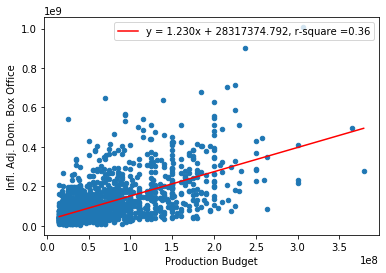

In [36]:
movie_df.plot.scatter('Infl. Adj. Production Budget','Infl. Adj. Dom. Box Office')
line_plot(movie_df['Infl. Adj. Production Budget'],movie_df['Infl. Adj. Dom. Box Office'])

The r-squared is : 0.0027429392795294033


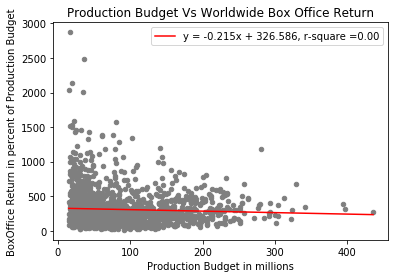

In [159]:
movie_df.plot.scatter('Infl. Adj. Production Budget','Return world per',colors='C7')
line_plot(movie_df['Infl. Adj. Production Budget'],movie_df['Return world per'])

# !!!
plt.title("Production Budget Vs Worldwide Box Office Return")
plt.xlabel("Production Budget in millions")
plt.ylabel("BoxOffice Return in percent of Production Budget")
plt.savefig('../plot_pics/pro2.png')



The r-squared is : 0.003532945556999656


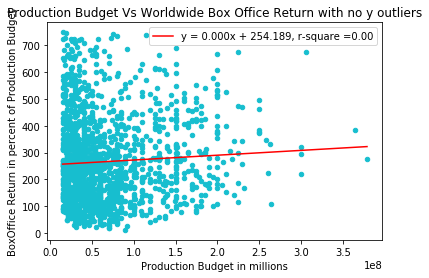

In [160]:
no_return_out.plot.scatter('Production Budget','Return world per',colors='C9')
line_plot(no_return_out['Production Budget'],no_return_out['Return world per'])
# big budget weak big movie
# not smart return

# !!!
plt.title("Production Budget Vs Worldwide Box Office Return with no y outliers")
plt.xlabel("Production Budget in millions")
plt.ylabel("BoxOffice Return in percent of Production Budget")
plt.savefig('../plot_pics/pro3.png')



In [149]:
you_csv = "../data_files/final_youtube_fix.csv"
you_df=pd.read_csv(you_csv)
you_df['max viewcount'].dropna()
movie_df['max viewcount']=you_df['max viewcount']
movie_df['max viewcount'].max()

105371718.0

In [161]:
youtube_df=you_df.dropna(subset=['max viewcount'])
youtube_df['Return world adj']=youtube_df['Infl. Adj. Worldwide Box Office']-youtube_df['Infl. Adj. Production Budget']
youtube_df['Return world per']=(youtube_df['Infl. Adj. Worldwide Box Office'])/youtube_df['Infl. Adj. Production Budget']*100
youtube_df['max viewcount']=youtube_df['max viewcount']/1000000


The r-squared is : 0.06346069893487452


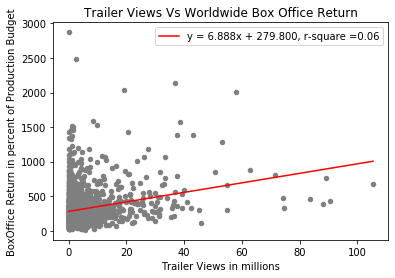

In [169]:
youtube_df.plot.scatter('max viewcount','Return world per',colors='C7')
line_plot(youtube_df['max viewcount'],youtube_df['Return world per'])
youtube_df['Infl. Adj. Worldwide Box Office']=youtube_df['Infl. Adj. Worldwide Box Office']*1000000

# !!!
plt.title("Trailer Views Vs Worldwide Box Office Return")
plt.xlabel("Trailer Views in millions")
plt.ylabel("BoxOffice Return in percent of Production Budget")
plt.savefig('../plot_pics/you1.png')

In [172]:
youtube_df['Infl. Adj. Worldwide Box Office']=youtube_df['Infl. Adj. Worldwide Box Office']*1000000


In [153]:
q1, q2, q3 = youtube_df['Return world per'].quantile([.25, .5, .75])
IQR = q3 - q1
lower_limit = q1 - (1.5 * IQR)
upper_limit = q3 + (1.5 * IQR)
upper_limit
no_return_out = youtube_df.loc[youtube_df['Return world per']<upper_limit]

The r-squared is : 0.04206830311894089


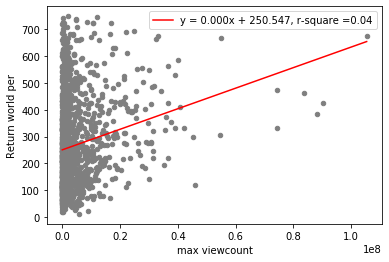

In [154]:
no_return_out.plot.scatter('max viewcount','Return world per',colors='C7')
line_plot(no_return_out['max viewcount'],no_return_out['Return world per'])

The r-squared is : 0.13410553817208204


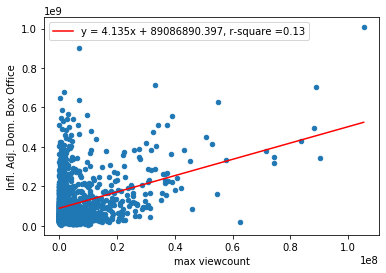

In [73]:
youtube_df.plot.scatter('max viewcount','Infl. Adj. Dom. Box Office')
line_plot(youtube_df['max viewcount'],youtube_df['Infl. Adj. Dom. Box Office'])

The r-squared is : 0.17710139150581322


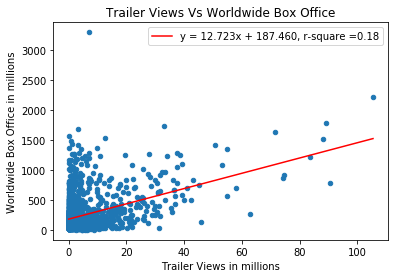

In [173]:
youtube_df.plot.scatter('max viewcount','Infl. Adj. Worldwide Box Office')
line_plot(youtube_df['max viewcount'],youtube_df['Infl. Adj. Worldwide Box Office'])

# !!!
plt.title("Trailer Views Vs Worldwide Box Office")
plt.xlabel("Trailer Views in millions")
plt.ylabel("Worldwide Box Office in millions")
plt.savefig('../plot_pics/you2.png')

The r-squared is : 0.009905525825446201


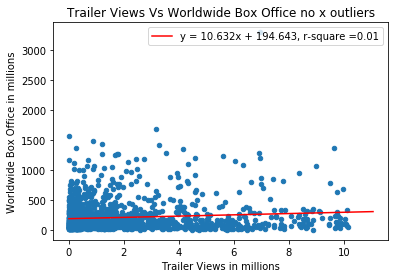

In [174]:
q1, q2, q3 = youtube_df['max viewcount'].quantile([.25, .5, .75])
IQR = q3 - q1
lower_limit = q1 - (1.5 * IQR)
upper_limit = q3 + (1.5 * IQR)
upper_limit
no_view_out = youtube_df.loc[youtube_df['max viewcount']<upper_limit]
no_view_out.plot.scatter('max viewcount','Infl. Adj. Worldwide Box Office')
line_plot(no_view_out['max viewcount'],no_view_out['Infl. Adj. Worldwide Box Office'])

# !!!
plt.title("Trailer Views Vs Worldwide Box Office no x outliers")
plt.xlabel("Trailer Views in millions")
plt.ylabel("Worldwide Box Office in millions")
plt.savefig('../plot_pics/you4.png')

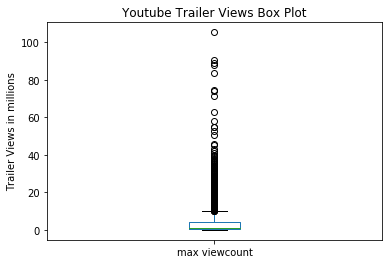

In [167]:
youtube_df['max viewcount'].plot.box()

# !!!
plt.title("Youtube Trailer Views Box Plot")
plt.ylabel("Trailer Views in millions")
plt.savefig('../plot_pics/you3.png')


In [84]:
youtube_2006=youtube_df.loc[youtube_df['release_year']<2005]
q1, q2, q3 = youtube_2006['max viewcount'].quantile([.25, .5, .75])
IQR = q3 - q1
lower_limit = q1 - (1.5 * IQR)
upper_limit = q3 + (1.5 * IQR)
upper_limit
youtube_2006_view_out=youtube_2006.loc[youtube_2006['max viewcount']<upper_limit]


The r-squared is : 0.08467457579811932


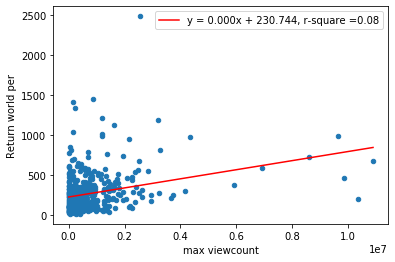

In [78]:
youtube_2006.plot.scatter('max viewcount','Return world per')
line_plot(youtube_2006['max viewcount'],youtube_2006['Return world per'])

The r-squared is : 0.10278089451518506


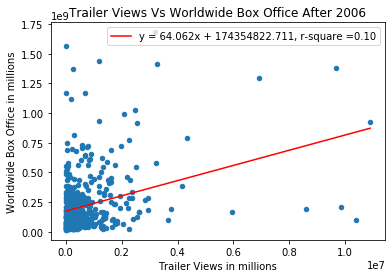

In [175]:
youtube_2006.plot.scatter('max viewcount','Infl. Adj. Worldwide Box Office')
line_plot(youtube_2006['max viewcount'],youtube_2006['Infl. Adj. Worldwide Box Office'])
# !!!

plt.title("Trailer Views Vs Worldwide Box Office After 2006")
plt.xlabel("Trailer Views in millions")
plt.ylabel("Worldwide Box Office in millions")
plt.savefig('../plot_pics/you5.png')

The r-squared is : 0.025259601899708314


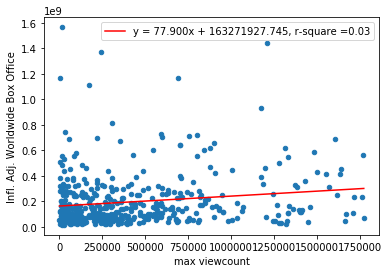

In [85]:
youtube_2006_view_out.plot.scatter('max viewcount','Infl. Adj. Worldwide Box Office')
line_plot(youtube_2006_view_out['max viewcount'],youtube_2006_view_out['Infl. Adj. Worldwide Box Office'])
# !!!


The r-squared is : 0.046715774856232774


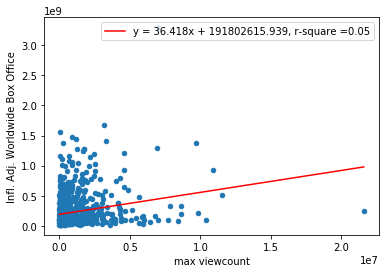

In [83]:
youtube_2010=youtube_df.loc[youtube_df['release_year']<2010]
youtube_2010.plot.scatter('max viewcount','Infl. Adj. Worldwide Box Office')
line_plot(youtube_2010['max viewcount'],youtube_2010['Infl. Adj. Worldwide Box Office'])
